In [2]:
import quantrocket.master
from quantrocket.master import get_securities
import pandas as pd, numpy as np

In [3]:
from quantrocket import get_prices

In [37]:
# china: FIBBG00203J8V6
# canada: FIBBG0029T2KJ5 (or FIBBG000BC18F5)
# japan: FIBBG000BL97R6
# mexico: FIBBG0015XN496 (london-1d)
# hungary: FIBBG000QGWGG7
# sweden: FIBBG000QZXB02 (mexico-1d)
# poland: FIBBG001CGQZG5 (mexico-1d)
# korea: FIBBG000PQY818 (mexico-1d)
# thailand: FIBBG0017DVJR6 (london-1d)
# newzealand: FIBBG001CGQZJ2 (mexico-1d)
# hong kong: FIBBG007V5QTW1 (china-1d)

name_to_index_sid_databases = {
    "china": ("FIBBG00203J8V6", "china-1d"), "canada": ("FIBBG0029T2KJ5", "canada-1d"), 
    "japan": ("FIBBG000BL97R6", "japan-1d"), "mexico": ("FIBBG0015XN496", "london-1d"), 
    "hungary": ("FIBBG000QGWGG7", "hungary-1d"), "sweden": ("FIBBG000QZXB02", "mexico-1d"), 
    "poland": ("FIBBG001CGQZG5", "mexico-1d"), "korea": ("FIBBG000PQY818", "mexico-1d"), 
    "thailand": ("FIBBG0017DVJR6", "london-1d"), "newzealand": ("FIBBG001CGQZJ2", "mexico-1d"), 
    "hongkong": ("FIBBG007V5QTW1", "china-1d"),
}

name_to_currency_sids = {
    "australia": "FXAUDUSD",
    "china": "FXUSDCNH", # china
    "newzeland": "FXNZDUSD", #newzeland
    "norway": "FXUSDNOK", # norway
    "canada": "FXUSDCAD", # canada
    "japan": "FXUSDJPY", # japan
    "thailand": "FXUSDTHB",
    "swiss": "FXUSDCHF", # swiss
    "turkey": "FXUSDTRY", # turkey
    "poland": "FXUSDPLN", # poland
    "singapore": "FXUSDSGD",
    "zecko": "FXUSDCZK",
    "denmark": "FXUSDDKK", # denmark
    "hungary": "FXUSDHUF", # hungary
    "eu": "FXEURUSD",
    "england": "FXGBPUSD", # uk
    "mexico": "FXUSDMXN", # mexico
    "hongkong": "FXUSDHKD",
    "sweden": "FXUSDSEK", # sweden
    "southafrica": "FXUSDZAR",
}

sids_index = list(map(lambda p: p[0], name_to_index_sid_databases.values()))
sids_currency = list(map(lambda sid: sid.replace(".", ""), name_to_currency_sids.values()))

<AxesSubplot:xlabel='Field,Date'>

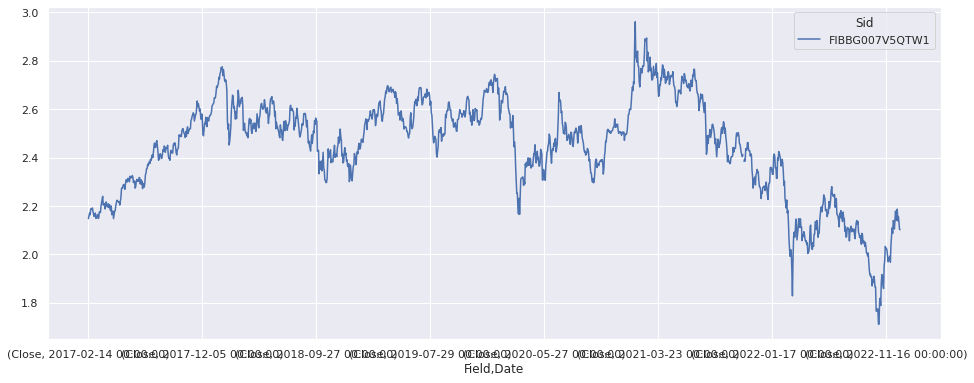

In [26]:
get_prices("china-1d", sids=["FIBBG007V5QTW1"], fields="Close", data_frequency="d").plot()

In [6]:
price_spy = get_prices("usstock-1d", sids=["FIBBG000BDTBL9"], fields="Close", data_frequency="d")

<AxesSubplot:xlabel='Field,Date'>

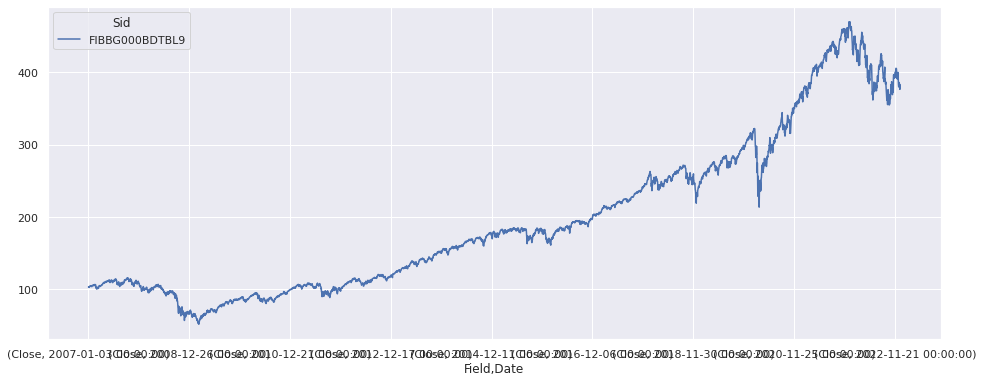

In [7]:
price_spy.plot()

In [8]:
alpha_days = 10
beta_days = 30
gamma_days = 10

In [9]:
price_spy.tail(10)

Sid               FIBBG000BDTBL9
Field Date                      
Close 2022-12-16          383.27
      2022-12-19          380.02
      2022-12-20          380.54
      2022-12-21          386.23
      2022-12-22          380.72
      2022-12-23          382.91
      2022-12-27          381.40
      2022-12-28          376.66
      2022-12-29          383.44
      2022-12-30             NaN

In [10]:
price_spy_past = price_spy.shift(beta_days)
return_spy_current = (price_spy - price_spy_past) / price_spy_past
return_spy = return_spy_current.shift(gamma_days)

<AxesSubplot:xlabel='Field,Date'>

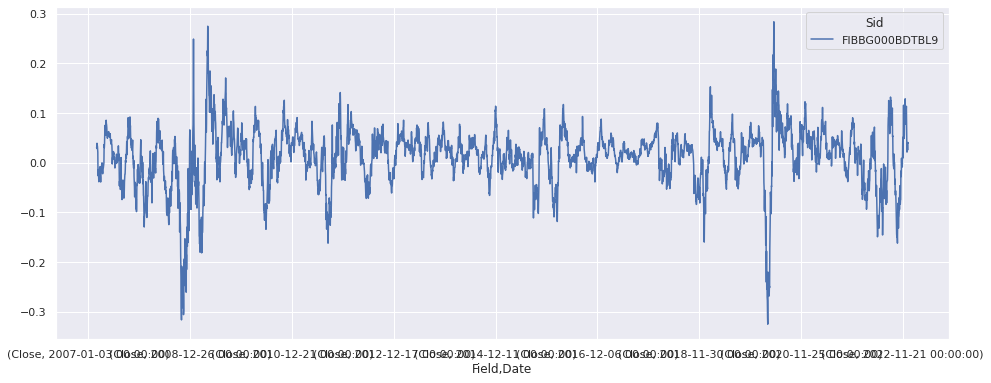

In [11]:
return_spy.plot()

<AxesSubplot:xlabel='Field,Date'>

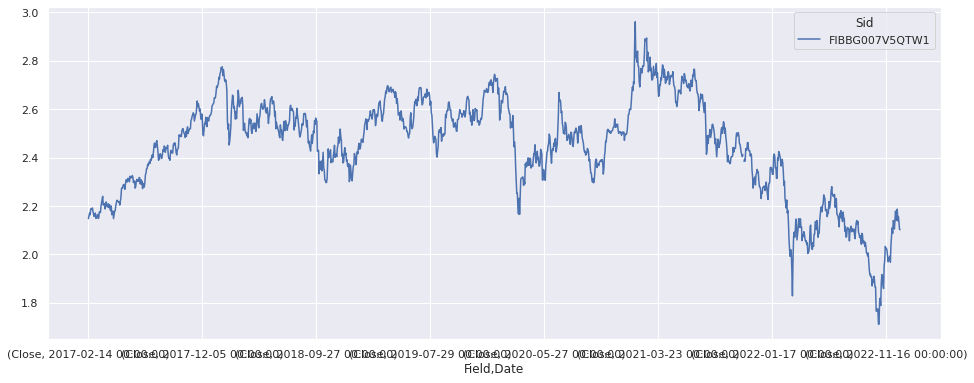

In [12]:
get_prices("china-1d", sids=["FIBBG007V5QTW1"], fields="Close", data_frequency="d").plot()

<AxesSubplot:xlabel='Field,Date'>

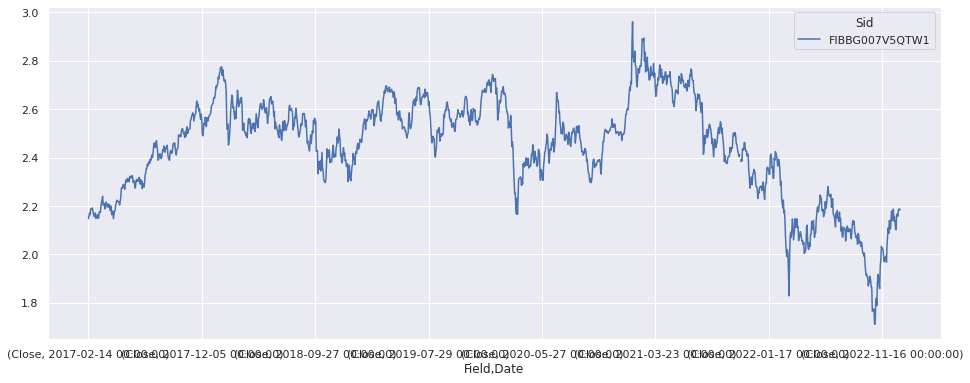

In [13]:
get_prices("global-1d", sids=["FIBBG007V5QTW1"], fields="Close", data_frequency="d").plot()

In [14]:
price_ind = get_prices("global-1d", sids=list(map(lambda p: p[0], trading_currency_flow_sid_databases.values())), fields="Close", data_frequency="d")

In [15]:
#sid, database=trading_currency_flow_sid_databases["japan"]
sid, database=list(map(lambda p: p[0], trading_currency_flow_sid_databases.values())), "global-1d"
price_ind = get_prices(database, sids=sid, fields="Close", data_frequency="d")
price_ind_past = price_ind.shift(alpha_days)
return_ind = (price_ind - price_ind_past) / price_ind_past
return_ind = return_ind.fillna(method="ffill")

In [16]:
return_ind

Sid               FIBBG000BL97R6  FIBBG000PQY818  FIBBG000QGWGG7  \
Field Date                                                         
Close 2007-04-09             NaN             NaN             NaN   
      2008-08-06             NaN             NaN             NaN   
      2008-08-07             NaN             NaN             NaN   
      2008-08-08             NaN             NaN             NaN   
      2008-08-11             NaN             NaN             NaN   
...                          ...             ...             ...   
      2022-12-26       -0.024390       -0.047660        0.024805   
      2022-12-27       -0.024390       -0.035686       -0.016581   
      2022-12-28       -0.047346       -0.031718       -0.024005   
      2022-12-29       -0.047346        0.001875       -0.033898   
      2022-12-30       -0.047346       -0.011717       -0.033898   

Sid               FIBBG000QZXB02  FIBBG0015XN496  FIBBG0017DVJR6  \
Field Date                                                         
Close 2007-04-09             NaN             NaN             NaN   
      2008-08-06             NaN             NaN             NaN   
      2008-08-07             NaN             NaN             NaN   
      2008-08-08             NaN             NaN             NaN   
      2008-08-11             NaN             NaN             NaN   
...                          ...             ...             ...   
      2022-12-26        0.000000        0.008811        0.001498   
      2022-12-27        0.000000        0.008811        0.001498   
      2022-12-28        0.000000        0.008811        0.001498   
      2022-12-29        0.000000        0.024048        0.061089   
      2022-12-30       -0.009019        0.013460        0.043231   

Sid               FIBBG001CGQZG5  FIBBG001CGQZJ2  FIBBG00203J8V6  \
Field Date                                                         
Close 2007-04-09             NaN             NaN             NaN   
      2008-08-06             NaN             NaN             NaN   
      2008-08-07             NaN             NaN             NaN   
      2008-08-08             NaN             NaN             NaN   
      2008-08-11             NaN             NaN             NaN   
...                          ...             ...             ...   
      2022-12-26        0.021494       -0.090753       -0.051884   
      2022-12-27        0.021494       -0.090753       -0.032051   
      2022-12-28        0.021494       -0.090753       -0.034108   
      2022-12-29        0.021494       -0.090753       -0.033152   
      2022-12-30        0.021494       -0.090753       -0.023845   

Sid               FIBBG0029T2KJ5  FIBBG007V5QTW1  
Field Date                                        
Close 2007-04-09             NaN             NaN  
      2008-08-06             NaN             NaN  
      2008-08-07             NaN             NaN  
      2008-08-08             NaN             NaN  
      2008-08-11             NaN             NaN  
...                          ...             ...  
      2022-12-26       -0.022293        0.008411  
      2022-12-27       -0.022293        0.012048  
      2022-12-28       -0.027422        0.000457  
      2022-12-29       -0.012514        0.020570  
      2022-12-30       -0.010748        0.013445  

[3666 rows x 11 columns]

In [27]:
return_inds = {}
for name, v in name_to_index_sid_databases.items():
    sid, database = v
    if sid not in return_ind:
        continue
    return_inds[name] = [return_ind[sid].iloc[-1]]

return_inds

{'china': [-0.023845007451564742],
 'canada': [-0.010747663551401724],
 'japan': [-0.047345767575322814],
 'mexico': [0.013459640813104388],
 'hungary': [-0.03389830508474576],
 'sweden': [-0.009018708358688655],
 'poland': [0.021494405332789342],
 'korea': [-0.011717034075322453],
 'thailand': [0.04323106629478654],
 'newzealand': [-0.0907534979247786],
 'hongkong': [0.013444598980064865]}

In [18]:
df = pd.DataFrame.from_dict(return_inds)

In [19]:
df

,china,canada,japan,mexico,hungary,sweden,poland,korea,thailand,newzealand,hongkong
0,-0.023845,-0.010748,-0.047346,0.01346,-0.033898,-0.009019,0.021494,-0.011717,0.043231,-0.090753,0.013445


In [20]:
df.sort_values(by=0, axis=1)

,newzealand,japan,hungary,china,korea,canada,sweden,hongkong,mexico,poland,thailand
0,-0.090753,-0.047346,-0.033898,-0.023845,-0.011717,-0.010748,-0.009019,0.013445,0.01346,0.021494,0.043231


In [21]:
df.sort_values(by=0, axis=1).columns.values

array(['newzealand', 'japan', 'hungary', 'china', 'korea', 'canada',
       'sweden', 'hongkong', 'mexico', 'poland', 'thailand'], dtype=object)

In [38]:
sids_currency

['FXAUDUSD',
 'FXUSDCNH',
 'FXNZDUSD',
 'FXUSDNOK',
 'FXUSDCAD',
 'FXUSDJPY',
 'FXUSDTHB',
 'FXUSDCHF',
 'FXUSDTRY',
 'FXUSDPLN',
 'FXUSDSGD',
 'FXUSDCZK',
 'FXUSDDKK',
 'FXUSDHUF',
 'FXEURUSD',
 'FXGBPUSD',
 'FXUSDMXN',
 'FXUSDHKD',
 'FXUSDSEK',
 'FXUSDZAR']

In [40]:
price__fx = get_prices("fx-1d", sids=sids_currency, fields="Close", data_frequency="d")

In [41]:
price__fx

Sid               FXAUDUSD  FXEURUSD  FXGBPUSD  FXNZDUSD  FXUSDCAD  FXUSDCHF  \
Field Date                                                                     
Close 2005-03-09  0.796900  1.343300  1.927550       NaN  1.203000  1.154400   
      2005-03-10  0.790200  1.342500  1.923750       NaN  1.204850  1.153400   
      2005-03-11  0.793000  1.345800  1.925900       NaN  1.205750  1.150200   
      2005-03-13  0.792800  1.345300  1.923650       NaN  1.205900  1.151100   
      2005-03-14  0.788900  1.336300  1.915650       NaN  1.206800  1.159700   
...                    ...       ...       ...       ...       ...       ...   
      2022-12-26  0.672760  1.063685  1.206695  0.629515  1.358200  0.932055   
      2022-12-27  0.673135  1.063970  1.202530  0.627225  1.352255  0.928940   
      2022-12-28  0.673700  1.061245  1.201665  0.631430  1.360955  0.929685   
      2022-12-29  0.677725  1.066110  1.205535  0.635065  1.354775  0.923305   
      2022-12-30  0.681125  1.069900  1.206930  0.635010  1.353890  0.926435   

Sid               FXUSDCNH  FXUSDCZK  FXUSDHKD  FXUSDHUF  FXUSDJPY   FXUSDMXN  \
Field Date                                                                      
Close 2005-03-09       NaN       NaN  7.799550       NaN  104.1100        NaN   
      2005-03-10       NaN       NaN  7.799650       NaN  104.1300        NaN   
      2005-03-11       NaN       NaN  7.799050       NaN  103.9900        NaN   
      2005-03-13       NaN       NaN  7.799450       NaN  104.4200        NaN   
      2005-03-14       NaN       NaN  7.799850       NaN  104.7500        NaN   
...                    ...       ...       ...       ...       ...        ...   
      2022-12-26   6.97659  22.75750  7.806760  376.2985  132.8755  19.405020   
      2022-12-27   6.97100  22.79500  7.800985  376.6550  133.4910  19.488505   
      2022-12-28   6.99698  22.82145  7.794845  378.6605  134.4640  19.432555   
      2022-12-29   6.97300  22.69945  7.796055  375.0700  133.0275  19.469400   
      2022-12-30   6.92097  22.62095  7.811205  369.0125  131.1275  19.508445   

Sid               FXUSDNOK   FXUSDSEK  FXUSDSGD   FXUSDTRY   FXUSDZAR  
Field Date                                                             
Close 2005-03-09       NaN        NaN       NaN        NaN        NaN  
      2005-03-10       NaN        NaN       NaN        NaN        NaN  
      2005-03-11       NaN        NaN       NaN        NaN        NaN  
      2005-03-13       NaN        NaN       NaN        NaN        NaN  
      2005-03-14       NaN        NaN       NaN        NaN        NaN  
...                    ...        ...       ...        ...        ...  
      2022-12-26  9.838065  10.496650   1.34789  18.687470  17.010000  
      2022-12-27  9.826975  10.476445   1.34742  18.791290  17.211605  
      2022-12-28  9.897090  10.479600   1.34994  18.723805  17.111995  
      2022-12-29  9.882195  10.466815   1.34359  18.709755  16.968845  
      2022-12-30  9.796380  10.436275   1.34065  18.671120  17.022500  

[4672 rows x 17 columns]